In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [3]:
# Opening the data set

parser = Sbopen()
idEvent = 69301 # indicates the event of that we are taking the data
df , related , freeze, tactics = parser.event(idEvent)

In [4]:
#print(df.columns)

team1 , team2 = df.team_name.unique()
print('team 1 is ', team1, 'team 2 is ', team2 )

team 1 is  England Women's team 2 is  Sweden Women's


In [5]:
df.type_name.unique() # kinds of events in data base

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carries',
       'Pressure', 'Ball Recovery', 'Clearance', 'Block', 'Dispossessed',
       'Duel', 'Dribbled Past', 'Dribble', 'Interception', 'Goal Keeper',
       'Miscontrol', 'Foul Committed', 'Foul Won', 'Injury Stoppage',
       'Error', 'Shot', 'Substitution', 'Half End', 'Tactical Shift',
       'Bad Behaviour'], dtype=object)

In [6]:
shotsData = df.loc[df['type_name']=='Shot'].set_index('id')
shotsData.head()

,index,period,timestamp,minute,second,possession,off_camera,duration,match_id,type_id,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
f158cbc0-a7a1-4787-8f73-15c66ae55764,340,1,00:10:24.396000,10,24,18,0.0,1.342346,69301,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
de5c41c5-9200-439e-b051-bfe2016d689a,531,1,00:15:28.174000,15,28,25,0.0,0.472900,69301,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106faebb-00bc-4453-b1c1-1bacdb1ebbc5,720,1,00:21:08.216000,21,8,35,0.0,1.254112,69301,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309f6f06-3977-49ac-8c0b-0e31b54404ed,742,1,00:22:46.449000,22,46,37,0.0,1.118733,69301,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d1c8dbc7-a164-4e34-8674-1eeba842cbbd,956,1,00:30:38.174000,30,38,52,0.0,1.359400,69301,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


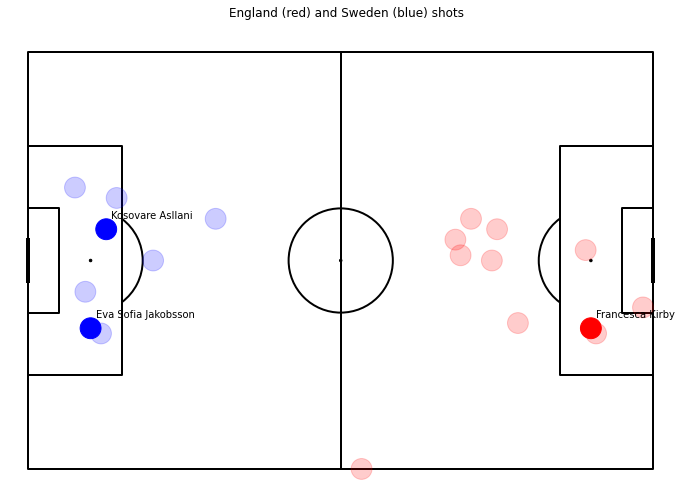

In [7]:
#Plotting the pitch

pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize=(10,7)) #plot the only the pitch

#defining the size of pitch (in this case is in yards - due to the database)
pitchLengthX=120
pitchLengthY = 80

#plotting the shots

for i , shot in shotsData.iterrows():
    x = shot['x']
    y = shot['y']
    goal = shot['outcome_name']=='Goal'
    team_name = shot['team_name']
    circlesize=2
    #plot England shot
    if team_name == team1:
        shotCircle = plt.Circle((x,y),circlesize,color = 'red')
        if goal:
            plt.text(x+1,y-2, shot['player_name'])
        else:
            shotCircle.set_alpha(.2)
    #Swenden shots
    else:
        shotCircle = plt.Circle((pitchLengthX-x,pitchLengthY-y),circlesize,color = 'blue')
        if goal:
            plt.text(pitchLengthX-x+1,pitchLengthY-y-2, shot['player_name'])
        else:
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)

fig.set_size_inches(10,7)
fig.suptitle('England (red) and Sweden (blue) shots')
plt.show()

In [8]:
# other way to do the same

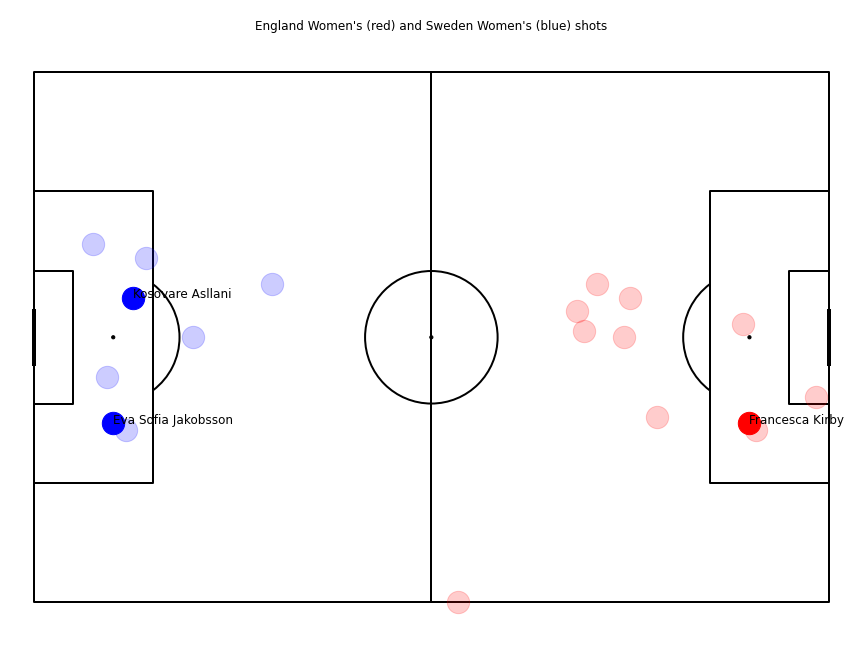

In [9]:
pitch= Pitch(line_color = 'black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)


def teamShots(team):
    mask = (df.team_name==team)&(df.type_name=='Shot')
    df_reduced = df.loc[mask,['x', 'y', 'outcome_name', 'player_name']]
    return df_reduced

def plotShots(team, side, colorEntry):
    df = teamShots(team)
    for i , row in df.iterrows():
        if side == 'Right':
            dx , dy = row.x,row.y
        else:
            dx, dy = 120 - row.x , 80 - row.y
        if row['outcome_name']=='Goal':
            alpha_value = 1.
            pitch.annotate(row['player_name'], (dx,dy), ax = ax['pitch'], fontsize = 12)
        else:
            alpha_value = 0.2
        
        pitch.scatter(dx,dy, alpha = alpha_value , s= 500,color = colorEntry, ax = ax['pitch'] )
    
def Horizontal_plots(team1, team2):
    
    plotShots(team1,'Right', 'red')
    plotShots(team2, 'Left' , 'blue')
    
    fig.suptitle( f'{team1} (red) and {team2} (blue) shots' )
    
Horizontal_plots(team1,team2)
                

In [10]:
#plotting  shots in one half

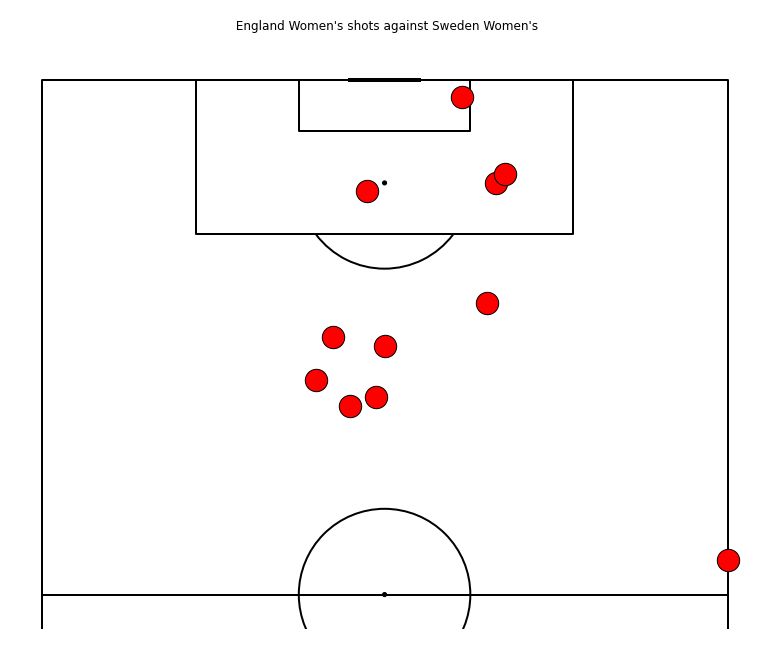

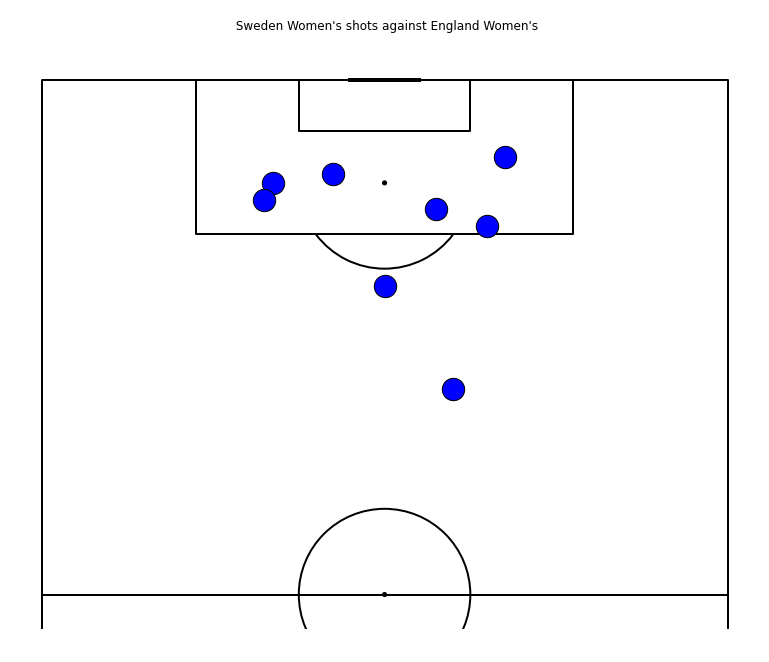

In [18]:
pitch = VerticalPitch(line_color = 'black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                      endnote_height=0.04, title_space=0, endnote_space=0)

def verticalPlot(team1 , team2, colorEntry):
    team1Shots = teamShots(team1)
    pitch.scatter(team1Shots.x, team1Shots.y , alpha = 1, s = 500, color = colorEntry, ax = ax['pitch'],edgecolors = 'black')
    fig.suptitle( f' {team1} shots against {team2}')
    plt.show()
    
verticalPlot(team1 , team2 , 'red')

pitch = VerticalPitch(line_color = 'black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                      endnote_height=0.04, title_space=0, endnote_space=0)
verticalPlot(team2 ,team1 , 'blue')